# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [25]:
#Dependencies and Setup
#I imported the NumPy library (import numpy as np) to use its functionality, 
#specifically the np.array function. In my code, I utilized NumPy to create an array from the unique Mouse IDs that have duplicates.
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

#Display the data table for preview
combined_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
#Checking the number of mice.

numb_mice = combined_data["Mouse ID"].nunique()
print(numb_mice)


249


In [27]:
#Our data should be uniquely identified by Mouse ID and Timepoint
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#I chose groupby instead of duplicate function for its clarity and the additional information it provides, such as the count of duplicates.

duplicate_mice_grouped = combined_data.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name='count')
duplicate_mice_ids = np.array(duplicate_mice_grouped[duplicate_mice_grouped['count'] > 1]['Mouse ID'].unique(), dtype=object)
duplicate_mice_ids

array(['g989'], dtype=object)

In [28]:
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]
colorder = ["Mouse ID", "Timepoint",	"Tumor Volume (mm3)", "Metastatic Sites",	"Drug Regimen",	"Sex",	"Age_months",	"Weight (g)"]
duplicate_mouse_data[colorder]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#I chose the cleaned_data method instead of isin for a more compact syntax

cleaned_data = combined_data.drop(duplicate_mouse_data.index)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
#Checking the number of mice in the clean DataFrame.

num_mice_clean = cleaned_data['Mouse ID'].nunique()
print(num_mice_clean)


248


## Summary Statistics

In [31]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#I used the groupby() method, which enables the data to be organized based on unique values in a specific column or multiple columns.
#Aggregate functions can be applied to each group.
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#Rename the columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

#Display the obtained statistics as a DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
#I have chosen the advanced method to generate a summary statistics table, utilizing the groupby and agg functions. 
#To demonstrate my abilities for creating complex functions in Python and applying them to the DataFrame columns.
#In this approach, I created a dictionary where each entry specified a particular aggregated statistic for the "Tumor Volume (mm3)" column. 
#This method resulted in a more structured table, and the dictionary provides a clear and organized presentation of the statistics. 
#This explicit approach enhances clarity during data analysis. 
#Detailed characteristics of each drug are importantto more thoroughly investigate the variability of responses to different drugs.

#Define a custom function to apply multiple aggregation functions
def custom_agg(series):
    return pd.Series({
        'mean': series.mean(),
        'median': series.median(),
        'var': series.var(),
        'std': series.std(),
        'sem': series.sem()
    })

#Use groupby and apply the custom aggregation function
summary_stats_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(custom_agg).unstack()

#Display the summary statistics table
summary_stats_table

#Using the aggregation method, produce the same summary statistics in a single line

summary_stats_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', var='var', std='std', sem='sem')

#Display the summary statistics table
print(summary_stats_table)


                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

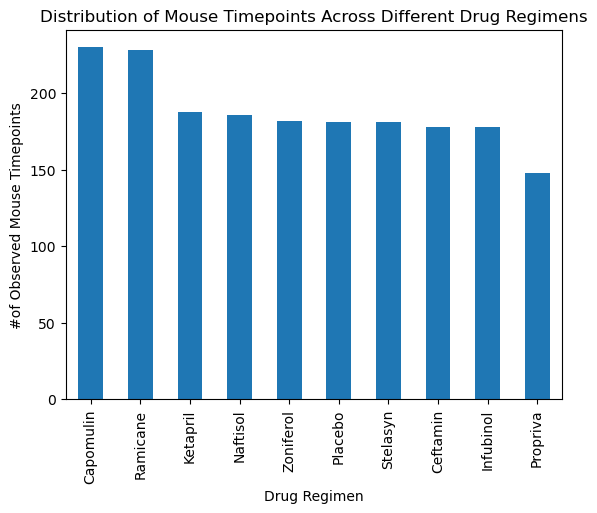

In [33]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Utilizing the Pandas library for visualization enables quicker chart creation. While Pandas provides access to a wide range of plotting 
#methods, its customization capabilities are not as extensive as those offered by Matplotlib.

#This code snippet demonstrates the convenience of using Pandas' 'plot' method to swiftly generate visualizations. Although Pandas 
#visualization encompasses a substantial array of methods, it may lack the intricate customization options found in Matplotlib.

#For more intricate and finely-tuned visualizations, Matplotlib remains a powerful choice due to its flexibility and broad customization 
#possibilities.

#Grouping data by Drug Regimen and calculating the total number of rows
regimen_counts = cleaned_data.groupby('Drug Regimen').size()

#Sorting values in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)

#Creating a bar chart
regimen_counts.plot(kind='bar')

#Setting the title and axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('#of Observed Mouse Timepoints')
plt.title('Distribution of Mouse Timepoints Across Different Drug Regimens')

#Displaying the plot
plt.show()


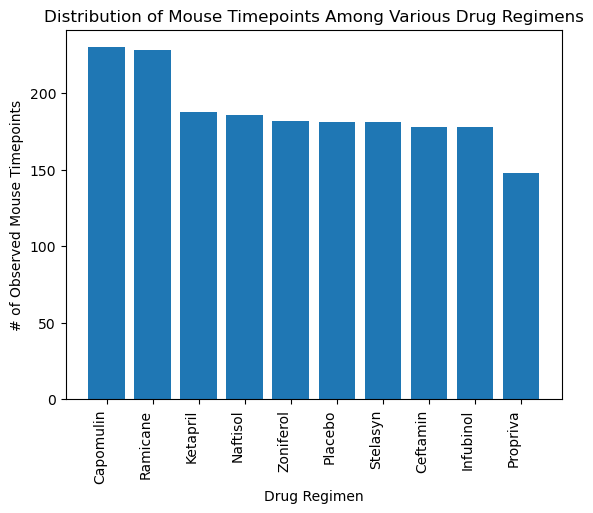

In [34]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#In contrast to visualizations with Pandas, Matplotlib-based visualizations do not rely on the pandas plotting class. 
#Consequently, the code tends to be more customizable but may be more verbose.

#This code snippet highlights the distinction in approach between Pandas and Matplotlib for visualization. 
#While Matplotlib offers increased customization, it often comes with the trade-off of requiring more intricate and detailed code.

#Creating a bar chart using pyplot
plt.bar(regimen_counts.index, regimen_counts)

#Setting the title and axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Distribution of Mouse Timepoints Among Various Drug Regimens')

#Rotating x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

#Displaying the plot
plt.show()


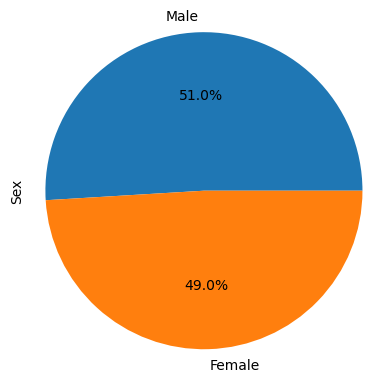

In [35]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas

#Grouping data by 'Sex' and counting the number of mice in each category
sex_distribution = cleaned_data['Sex'].value_counts()

#Creating a pie plot using Pandas
sex_distribution.plot(kind='pie', autopct='%1.1f%%',figsize=(4.5, 4.5))

plt.axis('equal')

#Displaying the pie plot
plt.show()


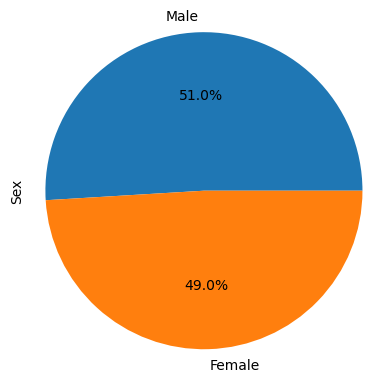

In [36]:
# Grouping data by 'Sex' and counting the number of mice in each category

plt.figure(figsize=(4.5, 4.5))
# Creating a pie plot using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%')

# Displaying the pie plot
plt.axis('equal')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Identify the four treatment regimens of interest
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Filter the data for the selected regimens
selected_data = combined_data[combined_data['Drug Regimen'].isin(selected_regimens)]

#Start by getting the last (greatest) timepoint for each mouse
last_timepoints = selected_data.groupby('Mouse ID')['Timepoint'].max()

#Create a DataFrame with the last timepoints
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [38]:
#Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Сreate empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Loop through each treatment regimen
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in selected_regimens:

    #Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    #add subset 
    tumor_vol_data.append(tumor_vol)

    #Calculate and print the IQR for each regimen
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
       
    #Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    print(f"\nFor {regimen}:")
    print(f"Q1 = {lower_q}, Q3 = {upper_q}, IQR = {iqr}, lower boundary = {lower_bound}, upper boundary = {upper_bound}, min = {tumor_vol.min()}, max = {tumor_vol.max()}")
 
    #Identify potential outliers
    potential_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"  - Potential outliers: {potential_outliers.tolist()}")

#Display the list of tumor volume data for later plotting
print("\nList of tumor volume data for plotting:")
print(tumor_vol_data)


For Capomulin:
Q1 = 32.37735684, Q3 = 40.1592203, IQR = 7.781863460000004, lower boundary = 20.70456164999999, upper boundary = 51.83201549, min = 23.34359787, max = 47.68596303
  - Potential outliers: []

For Ramicane:
Q1 = 31.56046955, Q3 = 40.65900627, IQR = 9.098536719999998, lower boundary = 17.912664470000003, upper boundary = 54.30681135, min = 22.05012627, max = 45.22086888
  - Potential outliers: []

For Infubinol:
Q1 = 54.04860769, Q3 = 65.52574285, IQR = 11.477135160000003, lower boundary = 36.83290494999999, upper boundary = 82.74144559000001, min = 36.3213458, max = 72.2267309
  - Potential outliers: [36.3213458]

For Ceftamin:
Q1 = 48.72207785, Q3 = 64.29983003, IQR = 15.577752179999997, lower boundary = 25.355449580000002, upper boundary = 87.66645829999999, min = 45.0, max = 68.92318457
  - Potential outliers: []

List of tumor volume data for plotting:
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34  

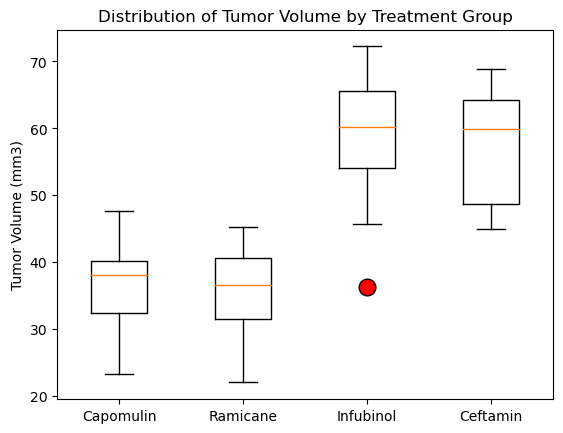

In [39]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=selected_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black'))

#Set the title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

#Display the box plot
plt.show()


The graph `Distribution of Tumor Volume by Treatment Group` indicates that the medians of these samples differ: for the first two drugs, the medians are around 37-38 and exhibit a narrower 
range in the central part of the dataset compared to the latter two drugs (the presence of outliers and a wide interquartile range). It can be inferred that, for further trials, it is advisable to recommend the first two drugs.

## Line and Scatter Plots

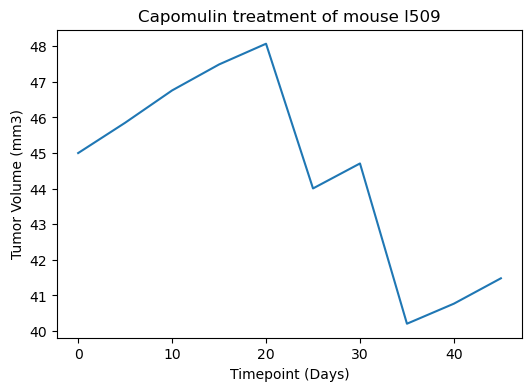

In [40]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Filter data for the mouse treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

#Choose a single mouse ID from Capomulin-treated mice
chosen_mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == chosen_mouse_id]

#Plot the line graph
plt.figure(figsize=(6, 4))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], label=f'Mouse ID: {chosen_mouse_id}')
plt.title(f'Capomulin treatment of mouse {chosen_mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



                    Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.841936
Tumor Volume (mm3)    0.841936            1.000000


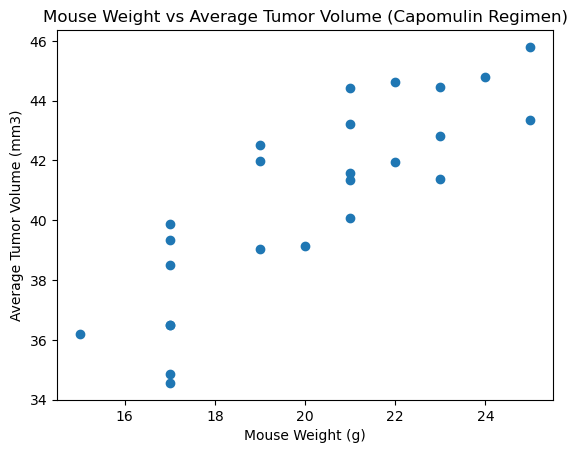

,Weight (g),Mouse ID,Tumor Volume (mm3)
0,15,x401,36.182040
1,17,f966,36.505973
2,17,m601,34.847470
3,17,r554,36.509212
4,17,s185,34.559143
5,17,t565,39.328725
6,17,u364,39.887495
7,17,y793,38.506829
8,19,g288,41.990097
9,19,l897,42.507261


In [47]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

#Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby(["Weight (g)", "Mouse ID"])['Tumor Volume (mm3)'].mean()

average_tumor_volume = average_tumor_volume.reset_index()

#Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
print(average_tumor_volume[['Weight (g)','Tumor Volume (mm3)']].corr())

#Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')

#Show the plot
plt.show()
average_tumor_volume

The correlation coefficient is 0.84, which is close to one, it is indicates strong positive correlation and the plot illustrates a small dispersion of points around the line. 
It can be concluded that a stable correlation exists between the mouse weight and tumor size.
Assuming I have a DataFrame named `data` with columns `Mouse ID`, `Weight (g)`, `Tumor Volume (mm3)`, and `Drug Regimen`
Filter the data for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


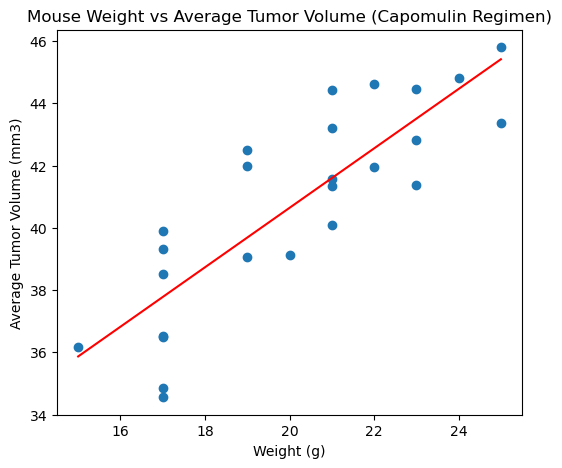

,Weight (g),Mouse ID,Tumor Volume (mm3)
0,15,x401,36.182040
1,17,f966,36.505973
2,17,m601,34.847470
3,17,r554,36.509212
4,17,s185,34.559143
5,17,t565,39.328725
6,17,u364,39.887495
7,17,y793,38.506829
8,19,g288,41.990097
9,19,l897,42.507261


In [48]:
#Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient
correlation_coefficient = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])

#Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

#Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

#Create a scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], label='Data Points')
plt.plot(average_tumor_volume['Weight (g)'], intercept + slope * average_tumor_volume['Weight (g)'], 'r', label=f'Linear Regression (R={r_value:.2f})')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')
plt.show()

average_tumor_volume

# Conclusions
1. The correclation coefficient is close to one, and the plot illustrates a small dispersion of points around the line. It can be concluded that a stable correlation exists between the mouse weight and tumor size.

2. Boxplot chart indicates that the medians of these samples differ: for **Capomulin** and **Ramicane** the medians are around 37-38 and exhibit a narrower 
range in the central part of the dataset compared to **Infubinol** and **Certamin**. 
It can be inferred that, for further trials, it is advisable to recommend **Capomulin** and **Ramicane**.